# PROJECT PHASE 3 SUBMISSION

# NAMES: Madison, Nakul, Huy, Mark


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from bs4 import BeautifulSoup
import numpy as np
from datetime import time

# import wbgapi as wb 
# documentation: https://pypi.org/project/wbgapi/

In [2]:
#only select the rows where year is from 1970 
#because that's when most countries began to have CO2 Emission data
df = pd.read_csv('gdp_co2_pop_1970_2023.csv')

#df['CO2 Emission'] = df['CO2 Emission'] * 1000

### Some countries still have NaN CO2 Emission. We replaced these NaN with the Average Emission
We won't be able to do any Regression when there are NaN values

In [3]:
#There are still countries with NaN CO2 Emission, let's fill these NaN with the average value of Emission
#df['CO2 Emission'] = df['CO2 Emission'].fillna(df['CO2 Emission'].mean())


In [4]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import pylab as py
from sklearn.preprocessing import PolynomialFeatures

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## Linear Regression

In [5]:
def add_bias_column(X):
    """
    Args:
        X (array): can be either 1-d or 2-d
    
    Returns:
        Xnew (array): the same array, but 2-d with a column of 1's in the first spot
    """
    
    # If the array is 1-d
    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])
    
    # If the array is 2-d
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])
        
    else:
        raise ValueError("Input array must be either 1-d or 2-d")

    return Xnew

def line_of_best_fit(X, y): 
    '''
    Args: 
        X (array): can be either 1-d or 2-d
        y (array): 1-d
    Returns: 
        m (vector): coefficient and intercept of the line of best fit 
    '''

    Xnew = add_bias_column(X) #add the '1' column to X

    m = np.matmul(np.linalg.inv(np.matmul(Xnew.T, Xnew)), np.matmul(Xnew.T, y))

    return m

def linreg_predict(Xnew, ynew, m): 
    '''
    Args: 
        Xnew (array): can be either 1-d or 2-d
        ynew (array): 1-d
        m (vector): coefficient and intercept of the line of best fit 
    Returns: 
        a dictionary containing ypreds, resids, mse, r2 
    '''
    ypreds = np.matmul(add_bias_column(Xnew), m) 
    #need to add bias column to Xnew, otherwise matmul won't work because inner dimensions mismatch
    
    resids = ynew - ypreds
    
    mse = (resids**2).mean()
    
    r2 = 1 - (mse / ynew.var())

    return {'ypreds':ypreds, 'resids':resids, 'mse':mse, 'r2':r2}

def get_mse(y_true, y_pred):
    '''
    Params: 
        y_true: the actual y value
        y_pred: the predicted y value

    Returns: 
        the mse score
    '''
    # calculate the mean squared distance between the predicted and actual y
    return np.mean((y_true - y_pred) ** 2)

def show_fit(X, y, slope, intercept):
    '''
    Params: 
        X: x value
        y: y value
        slope: slope of the line of best fit
        intercept: intercept of the line of best fit
    Returns:
        nothing, but plots the data points and a line of best fit
        Graph title is the equation of the line of best fit and MSE
    '''
    plt.figure()
    
    # in case this wasn't done before, transform the input data into numpy arrays and flatten them
    x = np.array(X).ravel()
    y = np.array(y).ravel()
    
    # plot the actual data
    plt.scatter(x, y, label='data')
    
    # compute linear predictions 
    # x is a numpy array so each element gets multiplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='linear fit')
    
    plt.legend()
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    # print the mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true=y, y_pred=y_pred)
    plt.suptitle(f'y_hat = {slope:.3f} * x + {intercept:.3f}, MSE = {mse:.3f}')
    

### Countries by income levels or regions

In [6]:
#GDP and CO2 Emission grouped by income levels
#these are keywords in the 'Country' column
income_levels = ['High income', 'Middle income', 'Least developed countries: UN classification']

countries_by_incomes = df[(df['Country'].isin(income_levels))]

regions = ['North America', 'South Asia', 'Sub-Saharan Africa']

countries_by_regions = df[(df['Country'].isin(regions))]


### Some countries still have NaN CO2 Emission. We replaced these NaN with the Average Emission
We won't be able to do any Regression when there are NaN values

### We sliced the df by certain incomes and regions, then fill the NaN in `CO2 Emission` with the `mean CO2 Emission` of the respective incomes and regions, so that this `mean` is more accurate (compared to the `mean CO2 Emission` of the entire df)

In [7]:
#There are still countries with NaN CO2 Emission, let's fill these NaN with the average value of Emission
countries_by_incomes['CO2 Emission'] = countries_by_incomes['CO2 Emission'].fillna(countries_by_incomes['CO2 Emission'].mean())

countries_by_regions['CO2 Emission'] = countries_by_regions['CO2 Emission'].fillna(countries_by_regions['CO2 Emission'].mean())

/var/folders/xw/yj2m39tn3rv0y3pw8fqb3nzm0000gn/T/ipykernel_47647/1401789788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_by_incomes['CO2 Emission'] = countries_by_incomes['CO2 Emission'].fillna(countries_by_incomes['CO2 Emission'].mean())
/var/folders/xw/yj2m39tn3rv0y3pw8fqb3nzm0000gn/T/ipykernel_47647/1401789788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_by_regions['CO2 Emission'] = countries_by_regions['CO2 Emission'].fillna(countries_by_regions['CO2 Emission'].mean())


### Separate Regions

In [8]:
# North America
north_america = df[(df['Country'] == 'North America')]
north_america['CO2 Emission'] = north_america['CO2 Emission'].fillna(north_america['CO2 Emission'].mean())

# South Asia
south_asia = df[(df['Country'] == 'South Asia')]
south_asia['CO2 Emission'] = south_asia['CO2 Emission'].fillna(south_asia['CO2 Emission'].mean())

# Sub-Saharan Africa
sub_saharan_africa = df[(df['Country'] == 'Sub-Saharan Africa')]
sub_saharan_africa['CO2 Emission'] = sub_saharan_africa['CO2 Emission'].fillna(sub_saharan_africa['CO2 Emission'].mean())

/var/folders/xw/yj2m39tn3rv0y3pw8fqb3nzm0000gn/T/ipykernel_47647/2376184790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_america['CO2 Emission'] = north_america['CO2 Emission'].fillna(north_america['CO2 Emission'].mean())
/var/folders/xw/yj2m39tn3rv0y3pw8fqb3nzm0000gn/T/ipykernel_47647/2376184790.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia['CO2 Emission'] = south_asia['CO2 Emission'].fillna(south_asia['CO2 Emission'].mean())
/var/folders/xw/yj2m39tn3rv0y3pw8fqb3nzm0000gn/T/ip

In [9]:
countries_by_incomes.head()

,Unnamed: 0,Country,Year,CO2 Emission,GDP per Capita,Total Population
10768,10768,Middle income,2023,12197.964635,6266.777432,5.870153e+09
10769,10769,Middle income,2022,32735.783700,6165.896194,5.823625e+09
10770,10770,Middle income,2021,32269.952300,5925.770975,5.782549e+09
10771,10771,Middle income,2020,30815.609600,5068.539981,5.731777e+09
10772,10772,Middle income,2019,31127.202400,5281.783603,5.675825e+09


### Predict North America's CO2 Emission with Total Population

In [10]:
# use population North America as X
X_pop_NA = np.array(north_america['Total Population'])
y_NA = np.array(north_america['CO2 Emission'])

y_NA

array([6958.81446226, 6766.7488    , 6649.0023    , 6319.7877    ,
       6921.5044    , 7068.3165    , 6876.6089    , 6918.6899    ,
       7046.0667    , 7171.7851    , 7131.0551    , 6979.0885    ,
       7220.4325    , 7405.5997    , 7141.6435    , 7650.4876    ,
       7856.8059    , 7726.4251    , 7839.8485    , 7827.4744    ,
       7742.0999    , 7657.4357    , 7798.5113    , 7891.6511    ,
       7703.1599    , 7688.8805    , 7631.1176    , 7335.3681    ,
       7148.6371    , 7064.4303    , 6931.4832    , 6800.6217    ,
       6685.5084    , 6738.392     , 6879.8929    , 6791.683     ,
       6521.0587    , 6345.728     , 6406.1       , 6402.3609    ,
       6154.5956    , 6183.8091    , 6472.022     , 6572.0023    ,
       6799.513     , 6718.3034    , 6719.064     , 6542.0103    ,
       6215.3756    , 6446.9754    , 6615.7278    , 6389.0367    ,
       6095.5458    , 6211.6941    ])

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_pop_NA, y_NA, test_size=0.3, random_state = 3)

#line of best fit with train sets
mtrain_NA = line_of_best_fit(Xtrain, ytrain)

#dict contains ypreds, resids, mse, r2 of North America
linreg_pred_vals_NA = linreg_predict(Xtest, ytest, mtrain_NA)

mtrain_NA

array([5.36643558e+03, 5.33553698e-06])

In [12]:
linreg_pred_vals_NA['resids']

array([   7.96907196, -107.97995002,  -82.81982371, -216.14336255,
       -359.2561091 ,  -86.14237251,  206.95049475,  689.39650198,
       -182.46378055, -419.85620853, -362.87244942,  724.29859721,
        -22.5457011 ,   24.87725253, -496.34327452, -397.8036523 ,
        373.26364157])

In [13]:
#line of best fit with the whole data
mfull_NA = line_of_best_fit(X_pop_NA, y_NA)

full_linreg_pred_vals_NA = linreg_predict(X_pop_NA, y_NA, mfull_NA)

mfull_NA

array([5.13401430e+03, 6.06440909e-06])

In [14]:
full_linreg_pred_vals_NA['resids']

array([ -449.8150221 ,  -624.88770674,  -730.98170544, -1055.75023849,
        -432.15857813,  -272.98950475,  -451.09062658,  -393.94585271,
        -249.96237795,  -108.33584428,  -132.81569612,  -269.31753746,
         -11.79012207,   189.07842132,   -57.10338982,   470.3020289 ,
         696.1571624 ,   584.99661555,   717.77847658,   723.69245122,
         656.47555616,   588.58802843,   747.82647302,   860.02270829,
         692.19539402,   698.73180534,   661.87092829,   387.70525456,
         221.74054997,   158.48066774,    46.90035488,   -61.40872962,
        -153.07448915,   -77.72845735,    83.29281734,    12.09678685,
        -243.02904244,  -403.18180001,  -327.84498517,  -317.42649169,
        -551.4007493 ,  -507.76614512,  -204.419961  ,   -89.00193141,
         153.57878274,    88.7948834 ,   105.22324816,   -56.78929215,
        -369.05902621,  -122.57773635,    59.88503121,  -152.94335115,
        -431.3276201 ,  -295.49041548])

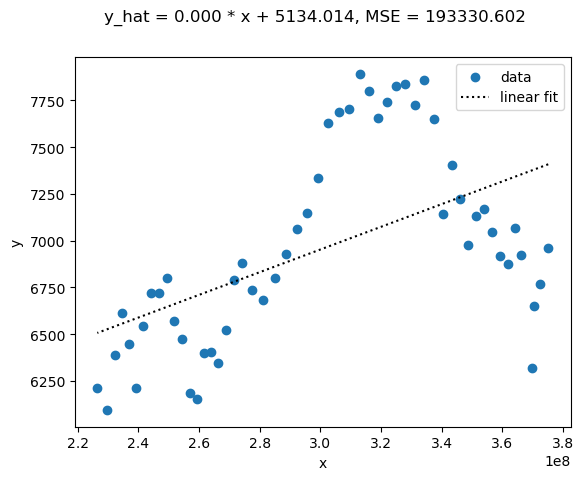

In [15]:
show_fit(X_pop_NA, y_NA, mfull_NA[1], mfull_NA[0])

### Predict North America's CO2 Emission with GDP per Capita

In [16]:
X_GDP_NA = np.array(north_america['GDP per Capita'])
y_NA = np.array(north_america['CO2 Emission'])


### Cross Val

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_pop_NA, y_NA, test_size=0.3, random_state = 3)

#line of best fit with train sets
mtrain_NA = line_of_best_fit(Xtrain, ytrain)

#dict contains ypreds, resids, mse, r2 of North America
linreg_pred_vals_NA = linreg_predict(Xtest, ytest, mtrain_NA)

mtrain_NA

array([5.36643558e+03, 5.33553698e-06])

In [18]:
linreg_pred_vals_NA['resids']

array([   7.96907196, -107.97995002,  -82.81982371, -216.14336255,
       -359.2561091 ,  -86.14237251,  206.95049475,  689.39650198,
       -182.46378055, -419.85620853, -362.87244942,  724.29859721,
        -22.5457011 ,   24.87725253, -496.34327452, -397.8036523 ,
        373.26364157])

### Whole data

In [19]:
#line of best fit with the whole data
mfull_NA = line_of_best_fit(X_GDP_NA, y_NA)

full_linreg_pred_vals_NA = linreg_predict(X_GDP_NA, y_NA, mfull_NA)

mfull_NA

array([6.57142593e+03, 1.17022034e-02])

In [20]:
res_NA = full_linreg_pred_vals_NA['resids']

In [21]:
mse_NA = full_linreg_pred_vals_NA['mse']
mse_NA

216100.54860502164

In [22]:
r2_NA = full_linreg_pred_vals_NA['r2']
r2_NA

0.20247003930009455

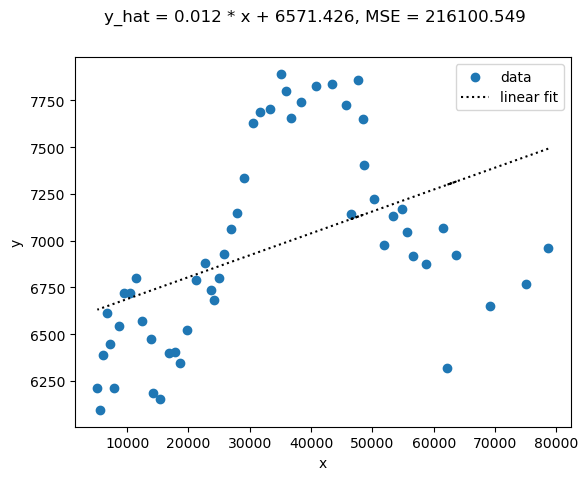

In [23]:
show_fit(X_GDP_NA, y_NA, mfull_NA[1], mfull_NA[0])

## Multiple Regression

### By regions

### Standardize the data

In [24]:
#standardize the data
x_feat_list = ['GDP per Capita', 'Total Population']
X = countries_by_regions[x_feat_list]

#we'll concatenate regions into X later, otherwise with regions we can't perform standardization of X feature
for x_feat in x_feat_list: 
    X[x_feat] = (X[x_feat] - X[x_feat].mean())/X[x_feat].std() #standardization of each x feature
    
X = np.array(X)

y = np.array(countries_by_regions['CO2 Emission'])

X

/var/folders/xw/yj2m39tn3rv0y3pw8fqb3nzm0000gn/T/ipykernel_47647/2326956727.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[x_feat] = (X[x_feat] - X[x_feat].mean())/X[x_feat].std() #standardization of each x feature


array([[-0.52012041,  0.95538402],
       [-0.51673303,  0.89428117],
       [-0.52014572,  0.83453304],
       [-0.52774653,  0.77511533],
       [-0.52036704,  0.71591232],
       [-0.52046186,  0.65791903],
       [-0.52578709,  0.60117212],
       [-0.52888298,  0.54599599],
       [-0.51920902,  0.49136129],
       [-0.50588479,  0.43725388],
       [-0.50732376,  0.38470307],
       [-0.51061092,  0.33342944],
       [-0.511606  ,  0.28359156],
       [-0.51964307,  0.23487148],
       [-0.53090573,  0.1872916 ],
       [-0.52522457,  0.14104242],
       [-0.53270315,  0.09602592],
       [-0.5408732 ,  0.05243055],
       [-0.54920611,  0.01038312],
       [-0.55676896, -0.03027249],
       [-0.5651988 , -0.06959395],
       [-0.57264327, -0.10758347],
       [-0.57451034, -0.14445763],
       [-0.57223646, -0.18017379],
       [-0.57329127, -0.21465573],
       [-0.55919029, -0.24785527],
       [-0.55809155, -0.27995732],
       [-0.55935016, -0.31155411],
       [-0.56299155,

### Cross Val

In [25]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state = 3)

mtrain_region = line_of_best_fit(Xtrain, ytrain)

linreg_pred_vals_region = linreg_predict(Xtest, ytest, mtrain_region)

mtrain_region

array([3595.74681895, 1735.41565811,   63.79105411])

In [26]:
linreg_pred_vals_region['mse']

2640769.669698676

In [27]:
linreg_pred_vals_region['r2']

0.5628914305307434

### Whole Data

In [28]:
m_region_full = line_of_best_fit(X, y)
full_linreg_predict_region = linreg_predict(X, y, m_region_full)
res_region = full_linreg_predict_region['resids']

In [29]:
mse_region = full_linreg_predict_region['mse']
mse_region

2562507.672714664

In [30]:
r2_region = full_linreg_predict_region['r2']
r2_region

0.5727062908977282

### By Income

### Standardize the data

In [31]:
#standardize the data
x_feat_list = ['GDP per Capita', 'Total Population']
X = countries_by_incomes[x_feat_list]

#we'll concatenate regions into X later, otherwise with regions we can't perform standardization of X feature
for x_feat in x_feat_list: 
    X[x_feat] = (X[x_feat] - X[x_feat].mean())/X[x_feat].std() #standardization of each x feature
    
X = np.array(X)

y = np.array(countries_by_incomes['CO2 Emission'])

X

/var/folders/xw/yj2m39tn3rv0y3pw8fqb3nzm0000gn/T/ipykernel_47647/4021170009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[x_feat] = (X[x_feat] - X[x_feat].mean())/X[x_feat].std() #standardization of each x feature


array([[-0.15621762,  2.2823854 ],
       [-0.16412388,  2.25473382],
       [-0.18294297,  2.23032217],
       [-0.25012586,  2.20014768],
       [-0.23341354,  2.16689552],
       [-0.23873353,  2.13165651],
       [-0.25892619,  2.09489257],
       [-0.28764663,  2.05706161],
       [-0.28762214,  2.01917536],
       [-0.27202018,  1.98053425],
       [-0.28409922,  1.94109169],
       [-0.30067815,  1.90147213],
       [-0.31778396,  1.8624341 ],
       [-0.36442094,  1.82441706],
       [-0.41224035,  1.78744902],
       [-0.40985153,  1.75109466],
       [-0.44483754,  1.71525962],
       [-0.4803956 ,  1.68000577],
       [-0.50374982,  1.64404251],
       [-0.52411193,  1.60721019],
       [-0.54089184,  1.57010306],
       [-0.55094756,  1.53307586],
       [-0.55128871,  1.49531958],
       [-0.55014003,  1.45650548],
       [-0.55642333,  1.4175722 ],
       [-0.55137953,  1.37855887],
       [-0.54937597,  1.33881562],
       [-0.55355764,  1.29871954],
       [-0.56171752,

### Cross Val

In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state = 3)

mtrain_income = line_of_best_fit(Xtrain, ytrain)

linreg_pred_vals_income = linreg_predict(Xtest, ytest, mtrain_income)

mtrain_income

array([11695.81237001,  4909.5688175 ,  6563.84870207])

In [33]:
linreg_pred_vals_income['mse']

26803000.97026269

In [34]:
linreg_pred_vals_income['r2']

0.6571980787349303

### Whole Data

In [35]:
m_income_full = line_of_best_fit(X, y)
full_linreg_predict_income = linreg_predict(X, y, m_income_full)
res_income = full_linreg_predict_income['resids']

In [36]:
mse_income = full_linreg_predict_income['mse']
mse_income

22827302.6962123

In [37]:
r2_income = full_linreg_predict_income['r2']
r2_income

0.7217936194149929

## Polynomial Regression

### X is the Population

### Regions of North America, South Asia, and Sub-Saharan Africa

In [38]:
X_pop_regions = np.array(countries_by_regions['Total Population']).reshape(-1,1)
poly = PolynomialFeatures(degree = 4, include_bias=False)
X_poly = poly.fit_transform(X_pop_regions)
y = np.array(countries_by_regions['CO2 Emission'])

### Cross Val

In [39]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_poly, y, test_size=0.3, random_state = 3)

m_poly = line_of_best_fit(Xtrain, ytrain)

linreg_predict_poly = linreg_predict(Xtest, ytest, m_poly)

linreg_predict_poly['mse']

2868809.3509895485

In [40]:
linreg_predict_poly['r2']

0.5251455793817289

### Whole Data

In [41]:
m_poly_full = line_of_best_fit(X_poly, y)

full_linreg_predict_poly = linreg_predict(X_poly, y, m_poly_full)

res_poly = full_linreg_predict_poly['resids']
full_linreg_predict_poly['mse']

2488437.8373118965

In [42]:
full_linreg_predict_poly['r2']

0.5850573074581252

### Countries by Income Levels: `High income`, `Middle income`, `Least developed countries: UN classification`

In [43]:
X_pop_incomes = np.array(countries_by_incomes['Total Population']).reshape(-1,1)
poly = PolynomialFeatures(degree = 4, include_bias=False)
X_poly = poly.fit_transform(X_pop_incomes)
y = np.array(countries_by_incomes['CO2 Emission'])

### Cross Val

In [44]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_poly, y, test_size=0.3, random_state = 3)

m_poly = line_of_best_fit(Xtrain, ytrain)

linreg_predict_poly = linreg_predict(Xtest, ytest, m_poly)

linreg_predict_poly['mse']

18392625.565436598